---
---

# Undertanding ECI with A Toy Model

---
---

2019-07-18 11:12:49 

Economies grow by upgrading the products they produce and export.

> **The Product Space Conditions the Development of Nations** C. A. Hidalgo, B. Klinger, A.-L. Barabási,R. Hausmann. Science. 2007


The technology, capital, institutions, and skills needed to make newer products are more easily adapted from some products than from others. 

- more-sophisticated products are located in a densely connected core
- less-sophisticated products occupy a less-connected periphery.
- countries move through the product space by developing goods close to those they currently produce. 
- Most countries can reach the core only by traversing empirically infrequent distances

For Adam Smith, wealth was related to the division of labor.

> **The building blocks of economic complexity**. Ce ́sar A. Hidalgo and Ricardo Hausmann. PNAS. 2009


- interpreting trade data as a bipartite network
- to quantify the complexity of a country’s economy by characterizing the structure of this network. 
- ECI are correlated with a country’s level of income, and that deviations from this relationship are predictive of future growth.



In [108]:
# https://github.com/hashc/ECI/blob/master/ECI.py
# download this .py file and place it in the same folder of this notebook
from ECI import *

In [1]:

import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse.linalg 
import scipy
import pandas as pd
import copy
import seaborn as sns
import pickle
from scipy import sparse

# Toy Data

In [2]:
# 实际例子
product_name = ["steel","oil","chip","bean","clothes"]
country_name = ["USA","China","Viet Nam"]

我们构造四种情况：

固定中国和美国的出口产品，调整越南的出口产品，观察其变化：

1. Vietnam: bean
2. Vietnam: Bean, Cloth. 
3. Vietnam: Bean, Cloth, Steel.
4. Vietnam: Bean, Steel


In [3]:
X0 = ['USA',   'USA', 'USA',  'USA', 'China', 'China', 'China', 'Viet Nam']
Y0 = ['steel', 'oil', 'chip', 'bean', 'steel', 'bean', 'clothes', 'bean']

1. Vietnam: bean

~|steel|oil|chip|bean|clothes
--|--|--|--|--|--
USA|1|1|1|1|0
China|1|0|0|1|1
Viet Nam|0|0|0|1|0

In [4]:
X1 = ['USA',   'USA', 'USA',  'USA', 'China', 'China', 'China', 'Viet Nam', 'Viet Nam']
Y1 = ['steel', 'oil', 'chip', 'bean', 'steel', 'bean', 'clothes', 'bean',    'clothes']

In [5]:
X2 = ['USA',   'USA', 'USA', 'USA',  'China', 'China', 'China', 'Viet Nam', 'Viet Nam','Viet Nam']
Y2 = ['steel', 'oil', 'chip', 'bean', 'steel', 'bean', 'clothes', 'bean',    'clothes',  'steel']

In [6]:
X3 = ['USA',   'USA', 'USA', 'USA',  'China', 'China', 'China', 'Viet Nam', 'Viet Nam']
Y3 = ['steel', 'oil', 'chip', 'bean', 'steel', 'bean', 'clothes', 'bean',     'steel']

# Measure ECI & PCI

In this simple case, $M_{CP} = 1$

$$K_{C,N} = \frac{1}{K_{C, 0}} \sum_{P} M_{CP} K_{P, N-1}$$

$$K_{P,N} = \frac{1}{K_{P, 0}} \sum_{C} M_{CP} K_{C, N-1}$$

In [7]:
def get_ecipci(X, Y):
    L_x = list(set(X))
    L_y = list(set(Y))
    x2id = dict(zip(L_x,range(len(L_x))))
    y2id = dict(zip(L_y,range(len(L_y))))
    x = [x2id[xi] for xi in X]
    y = [y2id[yi] for yi in Y]
    data = [1]*len(x)
    m,n = len(x2id),len(y2id)
    M = sparse.csc_matrix((data,(x,y)),shape=(m,n))
    M = np.matrix(M.toarray())
    eci,pci = Get_eci_pci(M)
    eci = Get_z_score(eci)
    pci = Get_z_score(pci)
    {}
    return eci, pci, L_x, L_y

In [8]:
e0, p0,country_name0, product_name0 = get_ecipci(X0, Y0)
e1, p1,country_name1, product_name1 = get_ecipci(X1, Y1)
e2, p2,country_name2, product_name2 = get_ecipci(X2, Y2)
e3, p3,country_name3, product_name3 = get_ecipci(X3, Y3)

==Time 0.02==
==Time 0.00==
==Time 0.00==
==Time 0.00==


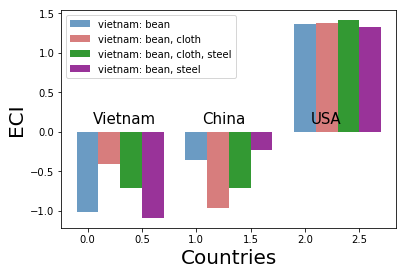

In [9]:
bar_width=0.2

plt.bar(x=range(len(country_name0)), height=e0, label='vietnam: bean',
    color='steelblue', alpha=0.8, width=bar_width)

plt.bar(x=np.arange(len(country_name0))+bar_width, height=e1,
    label='vietnam: bean, cloth', color='indianred', alpha=0.8, width=bar_width)

plt.bar(x=np.arange(len(country_name0))+bar_width*2, height=e2,
    label='vietnam: bean, cloth, steel', color='green', alpha=0.8, width=bar_width)

plt.bar(x=np.arange(len(country_name0))+bar_width*3, height=e3,
    label='vietnam: bean, steel', color='purple', alpha=0.8, width=bar_width)
plt.text(0.05, 0.1, 'Vietnam', fontsize = 15)
plt.text(1.05, 0.1, 'China', fontsize = 15)
plt.text(2.05, 0.1, 'USA', fontsize = 15)
plt.ylabel('ECI', fontsize = 20)
plt.xlabel('Countries', fontsize = 20)

plt.legend();

1. Vietnam: bean
    - Vietnam只出口bean的时候，中国eci最低!!!其次是越南，最高的是美国；
2. Vietnam: Bean, Cloth. 
    - Vietnam同时出口bean和cloth的时候，越南最低，中国居中，最高的是美国；
3. Vietnam: Bean, Cloth, Steel.
    - Vietnam和中国一样出口bean、cloth、steel后，中越一样，最高的是美国；
4. Vietnam: Bean, Steel
    - 如果越南不出口cloth，只出口bean和steel，那么中国最低，越南居中!美国最高（但是略降低），如上图。

## 结论：
- ECI的算法很聪明的捕捉到了产品的科技“等级”
- 想要提升ECI，不仅要生产高级产品，而且要规避低级产品。

**提问**：ECI的公式里描述了 一个国家的eci是他所能生产产品pci的平均值（期望）。那么生产过低pci的产品就会拉低均值，所以一个问题是如果一个国家A可以生产全部的产品，另一个国家B只生产高级产品。那么得到的结论是A会比B的得分低。这个合理吗？

## 比较优势

> 不能不提和它相对应的一个概念，绝对优势（Absolute advantage）。后者很好理解。比如，中国的彩电制造技术比越南强，中国在彩电制造上对越南有绝对优势。

> 绝对优势和劣势是不是决定了人与人之间的分工关系或者国与国之间的贸易关系呢？乍一看这似乎是顺理成章的。中国比越南会生产彩电，当然是中国向越南出口彩电。但仔细一想，这个推理不能成立。尽管中国在彩电生产上对越南有绝对优势，但在电脑生产上的绝对优势更大。因而中越贸易中会是中国向越南出口电脑，越南向中国出口彩电。

两国的贸易关系是建立在比较优势而不是绝对优势的基础上。比较优势这个概念告诉我们，对一个各方面都强大的国家或个人，聪明的做法不是仰仗强势，四面出击，处处逞能或事必躬亲，而是将有限的时间、精力和资源用在自己最擅长的地方。

**Hidalgo**: the average ubiquity of a country’s products tends to decrease with its level of diversification (2009, p.10572).

In [10]:
def get_ecipci2(X, Y):
    L_x = list(set(X))
    L_y = list(set(Y))
    x2id = dict(zip(L_x,range(len(L_x))))
    y2id = dict(zip(L_y,range(len(L_y))))
    x = [x2id[xi] for xi in X]
    y = [y2id[yi] for yi in Y]
    data = [1]*len(x)
    m,n = len(x2id),len(y2id)
    M = sparse.csc_matrix((data,(x,y)),shape=(m,n))
    M = np.matrix(M.toarray())
    eci,pci = Get_eci_pci(M)
    eci = Get_z_score(eci)
    pci = Get_z_score(pci)
    eci_dic = {L_x[i]:eci[i] for i in range(len(eci))}
    pci_dic = {L_y[i]:pci[i] for i in range(len(pci))}
    return eci_dic, pci_dic

In [11]:
from collections import defaultdict

def get_countrys_product(x, y):
    dic = defaultdict(set)
    for k, i in enumerate(x):
        dic[i].add(y[k])
    return dic

In [12]:
e0, p0 = get_ecipci2(X0, Y0)
e1, p1 = get_ecipci2(X1, Y1)
e2, p2 = get_ecipci2(X2, Y2)
e3, p3 = get_ecipci2(X3, Y3)

dic0 = get_countrys_product(X0, Y0)
dic1 = get_countrys_product(X1, Y1)
dic2 = get_countrys_product(X2, Y2)
dic3 = get_countrys_product(X3, Y3)

==Time 0.00==
==Time 0.00==
==Time 0.00==
==Time 0.00==


In [13]:
def get_dat(e0, p0, dic0):
    dat0 = [(e0[j], np.mean([p0[i] for i in dic0[j]]), j) for j in e0.keys()]
    eci, pci_mean, cname = np.array(dat0).T
    eci = eci.astype(float)
    pci_mean = pci_mean.astype(float)
    return eci, pci_mean, cname

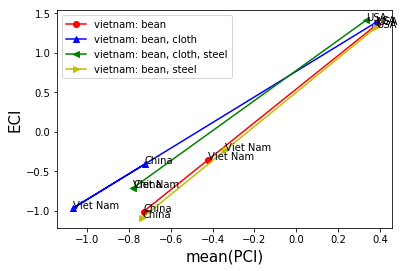

In [14]:
# Comparing four situations.
eci, pci_mean, cname = get_dat(e0, p0, dic0)
plt.plot(pci_mean, eci, 'r-o', label='vietnam: bean',)
for i in range(len(cname)):
    plt.text(pci_mean[i], eci[i], cname[i], fontsize = 10)
    
eci, pci_mean, cname = get_dat(e1, p1, dic1)
plt.plot(pci_mean, eci,'b-^', label='vietnam: bean, cloth')
for i in range(len(cname)):
    plt.text(pci_mean[i], eci[i], cname[i], fontsize = 10)
    
eci, pci_mean, cname = get_dat(e2, p2, dic2)
plt.plot(pci_mean, eci, 'g-<', label='vietnam: bean, cloth, steel')
for i in range(len(cname)):
    plt.text(pci_mean[i], eci[i], cname[i], fontsize = 10)
    
eci, pci_mean, cname = get_dat(e3, p3, dic3)
plt.plot(pci_mean, eci, 'y->', label='vietnam: bean, steel')
for i in range(len(cname)):
    plt.text(pci_mean[i], eci[i], cname[i], fontsize = 10)

plt.xlabel('mean(PCI)', fontsize = 15)
plt.ylabel('ECI', fontsize = 15)
plt.legend();

一个国家的ECI由它所出口产品的平均PCI决定。

# ECI & GDP

To download `country_sitcproduct2digit_year.zip` (22.05 MB) from:
https://intl-atlas-downloads.s3.amazonaws.com/index.html

To download gdp data from wordbank https://data.worldbank.org/indicator/ny.gdp.pcap.cd?most_recent_year_desc=true

In [87]:
import pandas as pd
df = pd.read_csv('country_sitcproduct2digit_year.csv')
df2017 = df[df['year']==2017]
dat = df2017[['sitc_eci', 'sitc_coi',  'location_code', 'location_name_short_en', ]]
dat = dat.drop_duplicates()
df2017_pci = df2017[['pci','location_code']].groupby('location_code').mean()
dat = dat.merge(df2017_pci, left_on = 'location_code', right_on = 'location_code', how = 'left')
df_gdp = pd.read_csv('./GDP/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_41089.csv', sep = '\t')
df_g = df_gdp[['Country Name', 'Country Code', '2017']]
dat = dat.merge(df_g, left_on = 'location_code', right_on = 'Country Code', how = 'inner')

In [109]:
len(df), len(df2017),  len(df_g), len(dat)

(835538, 17250, 264, 210)

In [89]:
dat.head()

,sitc_eci,sitc_coi,location_code,location_name_short_en,pci,Country Name,Country Code,2017
0,0.633293,-0.044210,ABW,Aruba,-0.200252,Aruba,ABW,25630.266490
1,-1.237445,-0.921007,AFG,Afghanistan,-0.200252,Afghanistan,AFG,556.302138
2,-1.822037,-1.232933,AGO,Angola,-0.200252,Angola,AGO,4095.812942
3,-0.288839,-0.111623,ALB,Albania,-0.200252,Albania,ALB,4532.889198
4,1.066444,0.340608,AND,Andorra,-0.200252,Andorra,AND,39134.393370


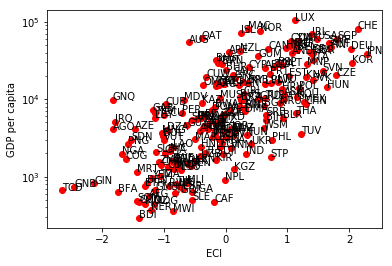

In [106]:
plt.plot(dat['sitc_eci'], dat['2017'], 'ro')
for i in dat.index:
    if pd.isnull(dat['2017'][i]) == False and pd.isnull(dat['sitc_eci'][i]) == False:
        plt.text(dat['sitc_eci'][i], dat['2017'][i], dat['location_code'][i])
plt.yscale('log')
plt.ylabel('GDP per capita')
plt.xlabel('ECI')
plt.show()

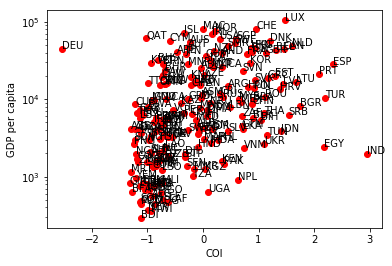

In [107]:
plt.plot(dat['sitc_coi'], dat['2017'], 'ro')
for i in dat.index:
    if pd.isnull(dat['2017'][i]) == False and pd.isnull(dat['sitc_coi'][i]) == False:
        plt.text(dat['sitc_coi'][i], dat['2017'][i], dat['location_code'][i])
plt.yscale('log')
plt.ylabel('GDP per capita')
plt.xlabel('COI')
plt.show()

In [114]:
def get_gdp_eci(year):
    df2016 = df[df['year']==year]
    dat = df2016[['sitc_eci', 'sitc_coi',  'location_code', 'location_name_short_en', ]]
    dat = dat.drop_duplicates()
    df2016_pci = df2016[['pci','location_code']].groupby('location_code').mean()
    dat = dat.merge(df2016_pci, left_on = 'location_code', right_on = 'location_code', how = 'left')
    df_gdp = pd.read_csv('./GDP/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_41089.csv', sep = '\t')
    df_g = df_gdp[['Country Name', 'Country Code', str(year)]]
    dat = dat.merge(df_g, left_on = 'location_code', right_on = 'Country Code', how = 'inner')
    return dat

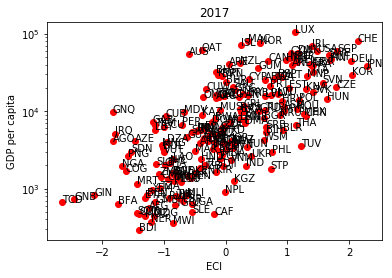

In [118]:
year = 2017
dat = get_gdp_eci(year)

plt.plot(dat['sitc_eci'], dat[str(year)], 'ro')
for i in dat.index:
    if pd.isnull(dat[str(year)][i]) == False and pd.isnull(dat['sitc_eci'][i]) == False:
        plt.text(dat['sitc_eci'][i], dat[str(year)][i], dat['location_code'][i])
plt.yscale('log')
plt.ylabel('GDP per capita')
plt.xlabel('ECI')
plt.title(str(year))
plt.show()

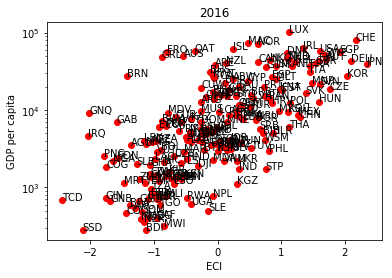

In [115]:
year = 2016
dat = get_gdp_eci(year)

plt.plot(dat['sitc_eci'], dat[str(year)], 'ro')
for i in dat.index:
    if pd.isnull(dat[str(year)][i]) == False and pd.isnull(dat['sitc_eci'][i]) == False:
        plt.text(dat['sitc_eci'][i], dat[str(year)][i], dat['location_code'][i])
plt.yscale('log')
plt.ylabel('GDP per capita')
plt.xlabel('ECI')
plt.title(str(year))
plt.show()

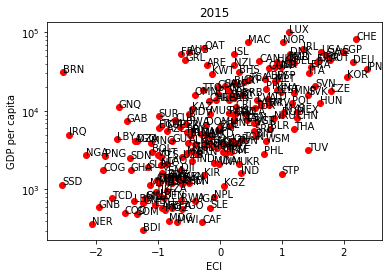

In [116]:
year = 2015
dat = get_gdp_eci(year)

plt.plot(dat['sitc_eci'], dat[str(year)], 'ro')
for i in dat.index:
    if pd.isnull(dat[str(year)][i]) == False and pd.isnull(dat['sitc_eci'][i]) == False:
        plt.text(dat['sitc_eci'][i], dat[str(year)][i], dat['location_code'][i])
plt.yscale('log')
plt.ylabel('GDP per capita')
plt.xlabel('ECI')
plt.title(str(year))
plt.show()

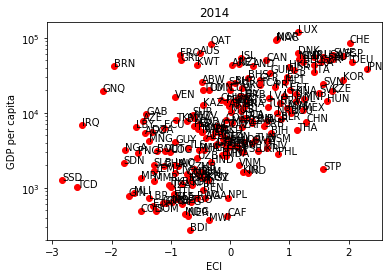

In [117]:
year = 2014
dat = get_gdp_eci(year)

plt.plot(dat['sitc_eci'], dat[str(year)], 'ro')
for i in dat.index:
    if pd.isnull(dat[str(year)][i]) == False and pd.isnull(dat['sitc_eci'][i]) == False:
        plt.text(dat['sitc_eci'][i], dat[str(year)][i], dat['location_code'][i])
plt.yscale('log')
plt.ylabel('GDP per capita')
plt.xlabel('ECI')
plt.title(str(year))
plt.show()